In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('ratings_Electronics.csv', sep =',')
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [39]:
df.shape

(566755, 4)

In [40]:
df.columns = ['userid','productid','ratings','timestamp']

In [41]:
df.head()

,userid,productid,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [42]:
df.shape

(566755, 4)

In [43]:
df.drop('timestamp', inplace = True, axis = 1)

In [44]:
df.isnull().sum()

userid       0
productid    0
ratings      0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,566755.0,3.98631,1.394925,1.0,3.0,5.0,5.0,5.0


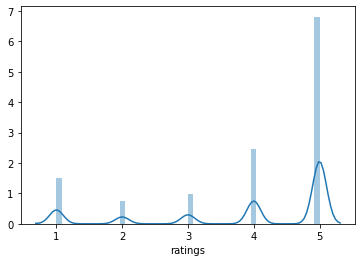

In [47]:
sns.distplot(df['ratings'])

We see that users have given most movies 5  ratings

In [48]:
a = pd.DataFrame(df.groupby('userid')['productid'].count())
a.head()

,productid
userid,
A0004478EF5NFPHLGCWG,1
A000681618A3WRMCK53V,1
A00101847G3FJTWYGNQA,1
A00124802J36AVPT3779A,1
A0015232111B3971DPSKF,1


In [49]:
b = a[a['productid']>=50]

In [50]:
b.head()

,productid
userid,
A11D1KHM7DVOQK,89
A12DLJESJKM1OQ,58
A1F9Z42CFF9IAY,51
A1FR68QH6Z4YZM,51
A1JWSDDIH5Z7DV,54


In [51]:
df_final = pd.merge(df, b, on = 'userid')

In [52]:
df_final

,userid,productid_x,ratings,productid_y
0,A5JLAU2ARJ0BO,1400532655,1.0,330
1,A5JLAU2ARJ0BO,B00003006R,5.0,330
2,A5JLAU2ARJ0BO,B00003G1RG,3.0,330
3,A5JLAU2ARJ0BO,B00004S9AK,5.0,330
4,A5JLAU2ARJ0BO,B00004SB92,4.0,330
...,...,...,...,...
1987,ABH9D1TEOJ56E,B0000DB4D1,5.0,64
1988,ABH9D1TEOJ56E,B0000DBJJT,4.0,64
1989,ABH9D1TEOJ56E,B0000DJY9P,4.0,64
1990,ABH9D1TEOJ56E,B0000DJYEO,3.0,64


In [53]:
df_final.isnull().sum()

userid         0
productid_x    0
ratings        0
productid_y    0
dtype: int64

In [54]:
df_final.drop('productid_y', axis = 1, inplace = True)

# Item-Item Collaborative System

In [55]:
!pip install surprise

In [56]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import Reader

In [57]:
reader = Reader(rating_scale=(1, 5))

In [58]:
data = Dataset.load_from_df(df_final, reader = reader )

In [59]:
trainset, testset = train_test_split(data, test_size = 0.3)

In [60]:
trainset.ur

defaultdict(list,
            {0: [(0, 5.0),
              (1, 1.0),
              (12, 2.0),
              (17, 4.0),
              (24, 5.0),
              (27, 5.0),
              (28, 1.0),
              (30, 2.0),
              (35, 5.0),
              (36, 5.0),
              (45, 4.0),
              (51, 5.0),
              (55, 5.0),
              (59, 3.0),
              (66, 5.0),
              (70, 4.0),
              (71, 1.0),
              (82, 5.0),
              (85, 3.0),
              (91, 1.0),
              (93, 5.0),
              (101, 2.0),
              (104, 5.0),
              (106, 5.0),
              (114, 4.0),
              (125, 5.0),
              (127, 5.0),
              (133, 4.0),
              (139, 5.0),
              (142, 5.0),
              (145, 3.0),
              (150, 5.0),
              (154, 5.0),
              (155, 5.0),
              (156, 5.0),
              (160, 5.0),
              (164, 5.0),
              (165, 2.0),
              

In [61]:
algo_2 = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algo_2.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [62]:
algo_2.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [63]:
df_final.head()

,userid,productid_x,ratings
0,A5JLAU2ARJ0BO,1400532655,1.0
1,A5JLAU2ARJ0BO,B00003006R,5.0
2,A5JLAU2ARJ0BO,B00003G1RG,3.0
3,A5JLAU2ARJ0BO,B00004S9AK,5.0
4,A5JLAU2ARJ0BO,B00004SB92,4.0


In [64]:
uid = 'A3BY5KCNQZXV5U'
mov_id = 'B00000JD4V'

In [65]:
pred = algo_2.predict(uid, mov_id, verbose = True)

user: A3BY5KCNQZXV5U item: B00000JD4V r_ui = None   est = 4.20   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


So we predict that user id 'A3BY5KCNQZXV5U' gives rating 4.21 to product 'B00000JD4V' acc to this recommender system

In [66]:
test_pred = algo_2.test(testset)

In [67]:
test_pred

[Prediction(uid='AKT8TGIT6VVZ5', iid='B00006I57N', r_ui=1.0, est=4.19583931133429, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A25HBO5V8S8SEA', iid='B00006HCHH', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AT6CZDCP4TRGA', iid='B00025EKOA', r_ui=4.0, est=4.19583931133429, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AGHZXQL9F94T9', iid='B0006HTPQ2', r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00006FRO9', r_ui=5.0, est=4.19583931133429, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A11D1KHM7DVOQK', iid='B000059L44', r_ui=1.0, est=4.19583931133429, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A25HBO5V8S8SEA', iid='B00006B6JH', r_ui=5.0, est=4.19583931133429, details={'was_impossible': True, 'reas

In [68]:
def gettop(test_pred, n = 5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in test_pred:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid]= user_ratings[:n]
        
    return top_n    
    
    
    


In [69]:
top_n = gettop(test_pred, n = 5)
top_n


NameError: ignored

In [70]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid,user_ratings) in user_ratings])

NameError: ignored

In [71]:
print("User-based Model : Test Set: root mean squared error")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set: root mean squared error
RMSE: 1.2367


1.2367416584865623

In [72]:
print("User-based Model : Test Set:  mean squared error")
accuracy.mse(test_pred, verbose = True)

User-based Model : Test Set:  mean squared error
MSE: 1.5295


1.5295299298360925

In [ ]:
print("User-based Model : Test Set:  mean absolute error")
accuracy.mae(test_pred, verbose= True)

User-based Model : Test Set:  mean absolute error
MAE:  0.9712


0.9711750118904288